In [55]:
include("eb.jl")
optcfg = OptConfig(MAXEVAL=1000, OPTIMIZER=:LD_MMA, DEBUG=true, XTOLABS = 1e-6);

m = FEModel(n=100, σ=0.1) = FEModel
  f: #342 (function of type ##342#348)
  n: Int64 100
  xs: StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
  ndata: Int64 100
  σ: Float64 0.1
  γ: Int64 1
  prior: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}

  0.167781 seconds (405.75 k allocations: 119.117 MiB, 22.10% gc time)
length(xhist) = 107



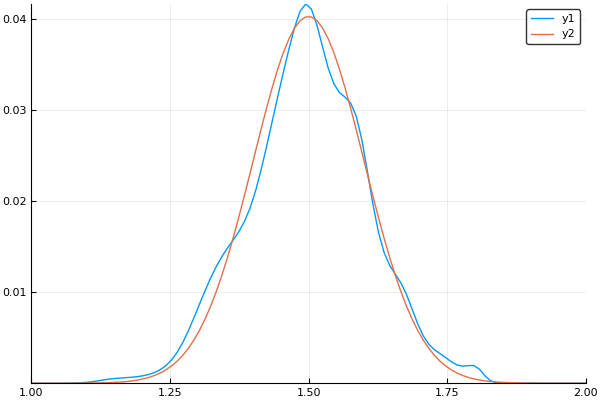

In [100]:
@show m = FEModel(n=100, σ=0.1)
ndata = 1000
reg = .1
d = generatedata(m, ndata)
@time w = ebprior(m, d,reg, optcfg)
@show length(xhist)
plot(m.xs,w)
plot!(m.xs, wprior(m))

m = FEModel(n=100, σ=0.1, prior=Truncated(MixtureModel([Normal(mu, 0.1) for mu = [1.25, 1.75]]), 1, 2)) = FEModel
  f: #342 (function of type ##342#348)
  n: Int64 100
  xs: StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
  ndata: Int64 100
  σ: Float64 0.1
  γ: Int64 1
  prior: Distributions.Truncated{Distributions.MixtureModel{Distributions.Univariate,Distributions.Continuous,Distributions.Normal{Float64}},Distributions.Continuous}

  0.174136 seconds (405.94 k allocations: 123.256 MiB, 25.08% gc time)
length(xhist) = 111



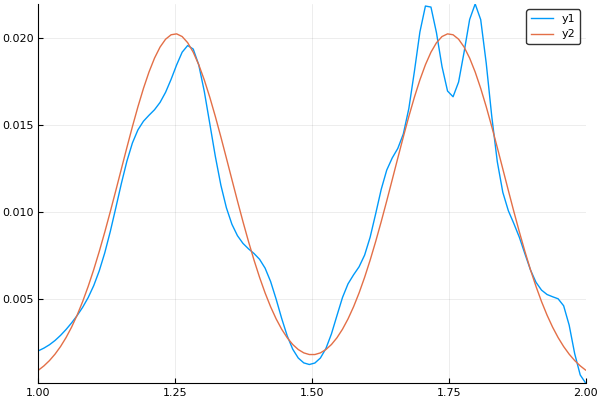

In [114]:
@show m = FEModel(n=100, σ=0.1, prior=Truncated(MixtureModel([Normal(mu, 0.1) for mu in [1.25, 1.75]]), 1,2))
ndata = 1000
reg = .1
d = generatedata(m, ndata)
@time w = ebprior(m, d,reg, optcfg)
@show length(xhist)
plot(m.xs,w)
plot!(m.xs, wprior(m))

m = PoissonModel(prior=Gamma(2, 1), xs=linspace(0.1, 10, 50)) = PoissonModel
  nx: Int64 20
  xs: StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}
  prior: Distributions.Gamma{Float64}

  1.047954 seconds (611.20 k allocations: 33.019 MiB, 8.70% gc time)
length(xhist) = 14



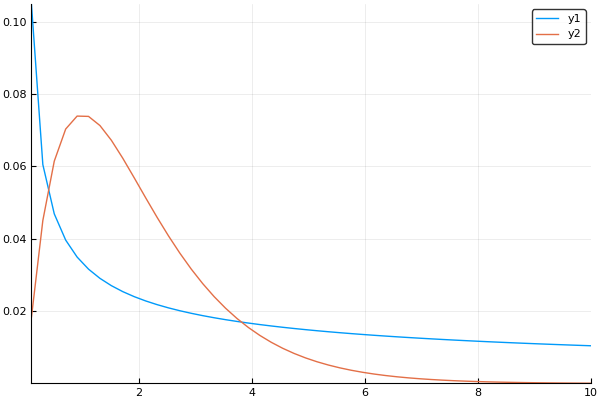

In [27]:
@show m = PoissonModel(prior=Gamma(2,1), xs = linspace(0.1,10, 50))
d = generatedata(m, 10)
@time w = ebprior(m, d, 100, optcfg)
@show length(xhist)
plot(m, w)
plot!(m.xs, wprior(m))

m = MuSigModel(nmeas=5, nx=30, ny=30) = MuSigModel
  nx: Int64 30
  ny: Int64 30
  bndmu: Tuple{Int64,Int64}
  bndsig: Tuple{Float64,Float64}
  xs: Array{Tuple{Float64,Float64}}((900,))
  γ: Int64 1
  priormu: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}
  priorsig: Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous}
  nmeas: Int64 5

 


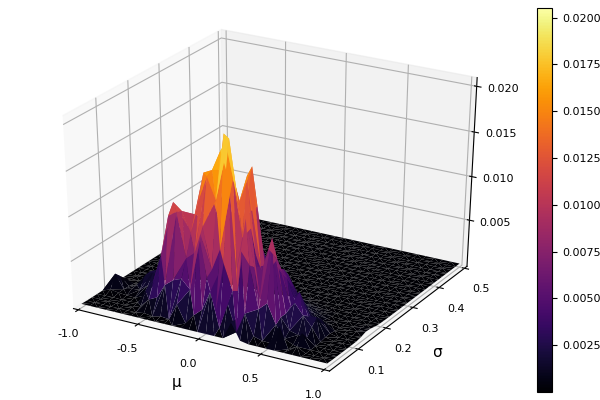

 4.183081 seconds (2.71 M allocations: 3.260 GiB, 17.77% gc time)
length(xhist) = 123
l2err(m, w) = 0.03882071377474862



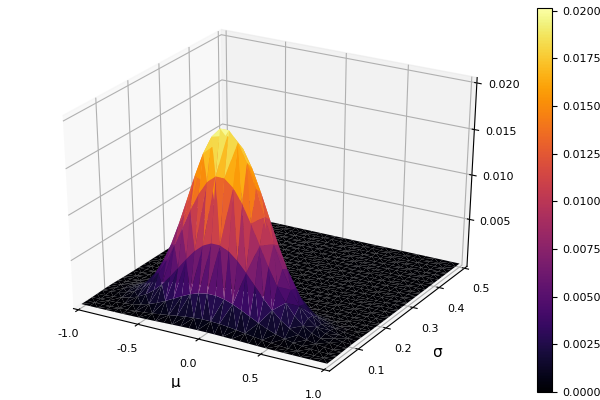

In [94]:
pyplot()
# prior = MixtureModel([Normal(-.5, 0.1), Normal(.2, 0.2)]))
@show m = MuSigModel(nmeas=5, nx=30, ny=30)
d = generatedata(m, 1000)
reg = .1
@time w = ebprior(m, d, reg, optcfg)
@show length(xhist)
@show l2err(m, w)
plot(m, w)|>display
plot(m, wprior(m))

In [54]:
obj, _ = objective(m, 1, d)
plotlyjs()
plot()
for o in [:LD_MMA, 
    #:LD_SLSQP, 
    :LD_LBFGS, 
    #:LD_VAR2,
    :LD_VAR1,
    #:LD_TNEWTON_PRECOND,
    #:LD_TNEWTON_PRECOND_RESTART,
    #:LD_TNEWTON_RESTART,
    #:LD_TNEWTON,
    ]
  @time w = ebprior(m, d, 1, OptConfig(OPTIMIZER=o, XTOLABS=0, MAXEVAL=200, DEBUG=true))
  cutoff(w) = w < .265 ? w + 10: NaN
  plot!(cutoff.(obj.(softmax.(xhist)))[30:end], label=o)
end
plot!()
plot!(yaxis=:log)

  5.390986 seconds (2.71 M allocations: 5.179 GiB, 19.24% gc time)
  5.083197 seconds (2.71 M allocations: 5.179 GiB, 14.42% gc time)
  5.229591 seconds (2.71 M allocations: 5.179 GiB, 13.90% gc time)



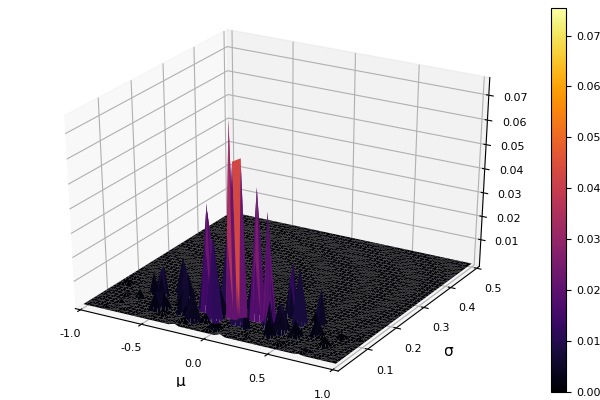

In [39]:
plot(m,w)